# I. Perkenalan

Nama: Wenny

Batch: FTDS-16

Objective: Buatlah model Classification untuk memprediksi default_payment_next_month.

- Logreg
- SVM
- DT
- RF
- KNN
- Naive Bayes
- Other Algoritm
- GridSearch
- CrossValidation

Query Dataset

```
SELECT limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month
FROM `bigquery-public-data.ml_datasets.credit_card_default`
LIMIT 29835;
```

# II. Import Libraries

In [ ]:
# kolom lib

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# pre/scaling/encode lib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler  # data skew
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

# clasification lib
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

# classification evaluation lib
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# searchCV
from sklearn.model_selection import GridSearchCV

#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import OneHotEncoder
#from xgboost import XGBClassifier
#from sklearn.metrics import plot_confusion_matrix
#from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# setup syntax
pd.set_option('display.max_columns', None)

# II. Data Loading

In [ ]:
# load dataset
data_o = pd.read_csv('h8dsft_P1M1_WennyChandraSari.csv')

# duplikat dataset
data = data_o.copy()

# melihat bagian atas dataset
data.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,0,47174.0,47974.0,48630.0,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,0,48088.0,45980.0,44231.0,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,0,78630.0,68921.0,46512.0,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,0,42058.0,35340.0,22110.0,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0


In [ ]:
# melihat bagian bawah dataset

data.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,-1,44100.0,0.0,28428.0,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,-1,280.0,6852.0,486.0,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,-2,0.0,47.0,207.0,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,-1,0.0,2920.0,0.0,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1
2964,20000.0,2,1,2,24.0,-1.0,-1.0,-2.0,-2.0,-2,-2,379.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
# melihat ukuran dataset

data.shape

(2965, 24)

In [ ]:
# melihat info dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   int64  
 10  pay_6                       2965 non-null   int64  
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

In [ ]:
# melihat nunique dari tiap kolom

data.nunique()

limit_balance                   59
sex                              2
education_level                  7
marital_status                   4
age                             49
pay_0                           11
pay_2                           10
pay_3                            9
pay_4                           10
pay_5                            9
pay_6                            8
bill_amt_1                    2643
bill_amt_2                    2592
bill_amt_3                    2549
bill_amt_4                    2504
bill_amt_5                    2482
bill_amt_6                    2461
pay_amt_1                     1415
pay_amt_2                     1372
pay_amt_3                     1302
pay_amt_4                     1214
pay_amt_5                     1194
pay_amt_6                     1189
default_payment_next_month       2
dtype: int64

Data terdiri atas 2.965 baris dan 24 kolom. Data terdiri dari 18 float dan 6 int. Beberapa data memiliki persebaran nilai yang besar.

In [ ]:
# mengubah nama kolum dari dataset

data = data.rename({'pay_0':'pay_1'}, axis=1)

Nama kolom pay_0 diubah menjadi pay_1.

In [ ]:
# mengubah tipe kolom age, pay_1, pay_2, pay_3, pay_4, pay_5, pay_6 menjadi int

data.astype({'age':'int64', 'pay_1':'int64', 'pay_2':'int64', 'pay_3':'int64', 'pay_4':'int64', 'pay_5':'int64', 'pay_6':'int64'}).dtypes

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_1                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   int64  
 10  pay_6                       2965 non-null   int64  
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

Tipe kolom age, pay_1 sampai dengan pay_6 diubah menjadi int64 karena tidak mengandung unsur desimal. Sehingga tipe kolom menjadi 18 float dan 6 int.

In [ ]:
# see if there are missing values

data.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_1                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

Data tidak memiliki missing values.

In [ ]:
# melihat kategori dari variabl

print('Nilai unik dari kolom ')

Nilai unik dari kolom 


---
Insight:
- Data terdiri atas 2.965 baris dan 24 kolom.
- Data terdiri dari 18 float dan 6 int.
- Beberapa data memiliki persebaran nilai yang besar.
- Nama kolom pay_0 diubah menjadi pay_1.
- Data tidak memiliki missing values.


# IV. Exploratory Data Analysis (EDA)

In [ ]:
# melihat dataset

data.head()

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,0,47174.0,47974.0,48630.0,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,0,48088.0,45980.0,44231.0,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,0,78630.0,68921.0,46512.0,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,0,42058.0,35340.0,22110.0,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0


In [ ]:
data.default_payment_next_month.value_counts()

0    2330
1     635
Name: default_payment_next_month, dtype: int64

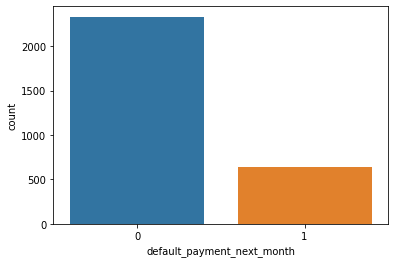

In [ ]:
# melihat keseimbangan target

sns.countplot(data=data, x='default_payment_next_month')

Dataset merupakan dataset imbalance dengan nilai perbandingan nilai 0 dan 1 adalah 2324 dan 631.

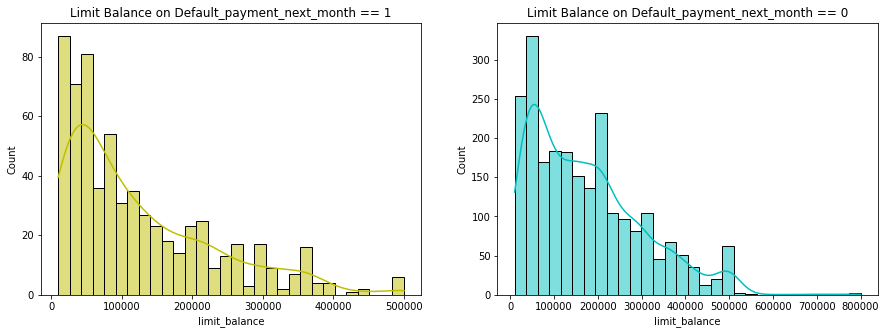

In [ ]:
# melihat hubungan limit_balance dan default_payment_next_month: dibagi per default_payment_next_month kemudian di histogram

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data[data.default_payment_next_month==1].limit_balance, bins =30, kde=True, color='y')
plt.title('Limit Balance on Default_payment_next_month == 1')

plt.subplot(1,2,2)
sns.histplot(data[data.default_payment_next_month==0].limit_balance, bins =30, kde=True, color='c')
plt.title('Limit Balance on Default_payment_next_month == 0')

plt.show()

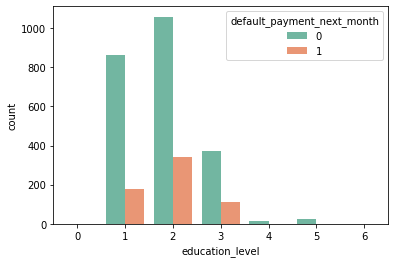

In [ ]:
# melihat hubungan education_level dan default_payment_next_month

sns.countplot(data=data, x='education_level', hue='default_payment_next_month', palette = 'Set2')

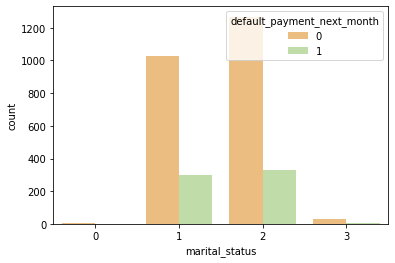

In [ ]:
# melihat hubungan marital_status dan default_payment_next_month

sns.countplot(data=data, x='marital_status', hue='default_payment_next_month', palette='Spectral')

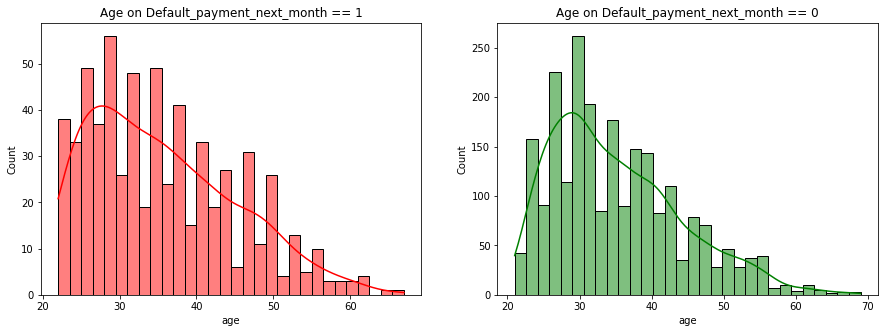

In [ ]:
# melihat hubungan age dan default_payment_next_month: dibagi per default_payment_next_month kemudian di histogram

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data[data.default_payment_next_month==1].age, bins =30, kde=True, color = 'r')
plt.title('Age on Default_payment_next_month == 1')

plt.subplot(1,2,2)
sns.histplot(data[data.default_payment_next_month==0].age, bins =30, kde=True, color = 'g')
plt.title('Age on Default_payment_next_month == 0')

plt.show()

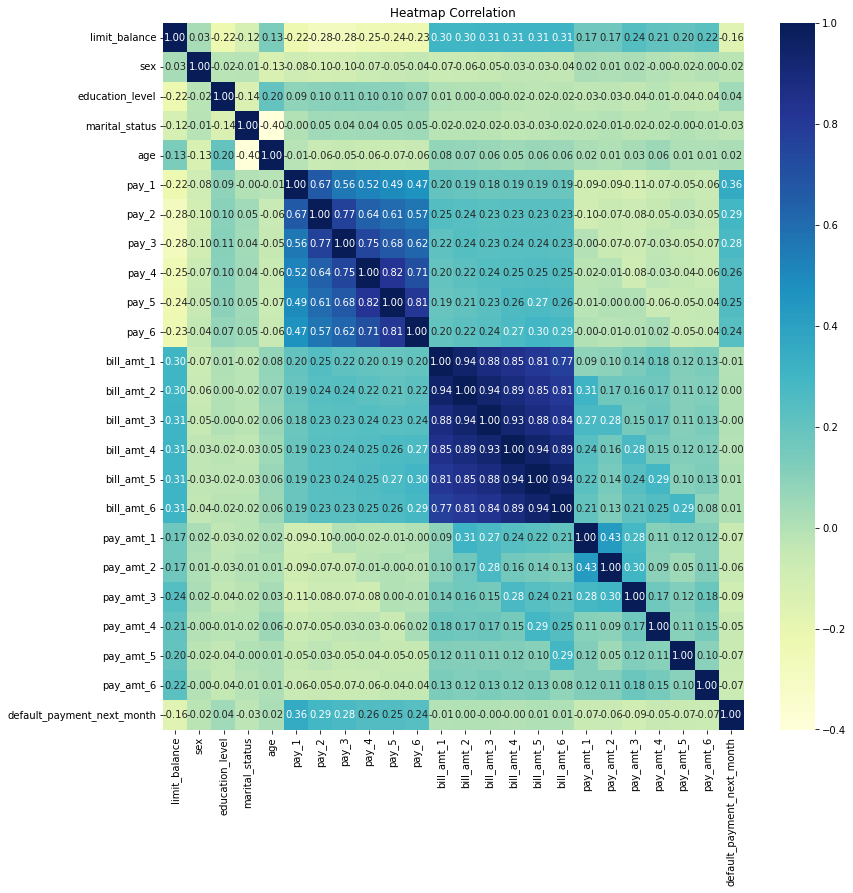

In [ ]:
# melihat hubungan keseluruhan kolom numerik dan kategorikal yang berbentuk numerik

plt.subplots(figsize=(13,13))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap ="YlGnBu")
plt.title("Heatmap Correlation")
plt.show()

In [ ]:
# melihat hubungan keseluruhan kolom

X = pd.get_dummies(data).corr()
X.style.background_gradient(cmap='coolwarm')

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
limit_balance,1.000000,0.028560,-0.220874,-0.117909,0.130805,-0.223497,-0.281057,-0.275726,-0.245538,-0.236102,-0.226140,0.300388,0.301188,0.305646,0.308918,0.309346,0.306496,0.171902,0.169361,0.242904,0.210302,0.200632,0.224960,-0.161909
sex,0.028560,1.000000,-0.016816,-0.011742,-0.127359,-0.078188,-0.104959,-0.098495,-0.072319,-0.053660,-0.043291,-0.067615,-0.058139,-0.045150,-0.033684,-0.032004,-0.035632,0.019311,0.014299,0.019432,-0.001635,-0.019963,-0.002479,-0.021765
education_level,-0.220874,-0.016816,1.000000,-0.135548,0.197189,0.089191,0.099282,0.105426,0.101337,0.096330,0.069986,0.008189,0.002172,-0.000919,-0.017839,-0.024139,-0.021942,-0.030440,-0.027683,-0.035931,-0.013496,-0.037795,-0.040558,0.044926
marital_status,-0.117909,-0.011742,-0.135548,1.000000,-0.400617,-0.000231,0.047172,0.037733,0.043507,0.047366,0.051295,-0.016926,-0.016148,-0.022133,-0.028957,-0.028412,-0.015740,-0.017355,-0.006396,-0.019958,-0.017476,-0.000289,-0.008024,-0.025998
age,0.130805,-0.127359,0.197189,-0.400617,1.000000,-0.009070,-0.061002,-0.048808,-0.061540,-0.069756,-0.055274,0.080546,0.071238,0.063405,0.050337,0.061422,0.057900,0.016988,0.009628,0.027720,0.058554,0.013403,0.010300,0.016905
pay_1,-0.223497,-0.078188,0.089191,-0.000231,-0.009070,1.000000,0.668640,0.560446,0.519716,0.493273,0.466796,0.200214,0.191016,0.184056,0.187317,0.185056,0.185651,-0.093121,-0.085982,-0.105665,-0.071562,-0.048355,-0.059863,0.356963
pay_2,-0.281057,-0.104959,0.099282,0.047172,-0.061002,0.668640,1.000000,0.765616,0.643265,0.605527,0.571933,0.248069,0.235818,0.227777,0.232091,0.228745,0.229091,-0.098743,-0.066226,-0.075787,-0.046495,-0.026198,-0.050794,0.288813
pay_3,-0.275726,-0.098495,0.105426,0.037733,-0.048808,0.560446,0.765616,1.000000,0.750440,0.676661,0.617316,0.216860,0.241912,0.229902,0.236443,0.236052,0.228902,-0.004377,-0.066426,-0.073095,-0.033320,-0.046254,-0.066192,0.275758
pay_4,-0.245538,-0.072319,0.101337,0.043507,-0.061540,0.519716,0.643265,0.750440,1.000000,0.823226,0.710399,0.200663,0.218286,0.240850,0.249524,0.252534,0.249842,-0.020703,-0.011330,-0.080911,-0.027776,-0.039732,-0.059409,0.255805
pay_5,-0.236102,-0.053660,0.096330,0.047366,-0.069756,0.493273,0.605527,0.676661,0.823226,1.000000,0.813437,0.191763,0.210235,0.231307,0.263476,0.267059,0.257019,-0.014592,-0.000027,0.002544,-0.060026,-0.045322,-0.042375,0.253319


Statement:
- default_payment_next_month memiliki hubungan dengan semua kolom. Hubungan terbesar dengan kolom pay_0 s/d pay_6. Kita akan menggunakan semua kolom sebagai feature pada feature selection.

# V. Data Preprocessing

## 1. Get Data for model Inference

In [ ]:
# mengambil data untuk inference

data_i = data.sample(10, random_state = 20)

# mengeluarkan data_i dari dataset

data = data.drop(data_i.index)

# mereset index

data_i.reset_index(drop=True, inplace=True)
data.reset_index(drop=True, inplace=True)

In [ ]:
# memeriksa ukuran hasil

print('Ukuran data asli :',data_o.shape)
print('Ukuran data inference :', data_i.shape)
print('Ukuran data asli - data inference :', data.shape)

Ukuran data asli : (2965, 24)
Ukuran data inference : (10, 24)
Ukuran data asli - data inference : (2955, 24)


## 2. Splitting Between X and y

In [ ]:
# split X (features) dan y (target)

X = data.drop('default_payment_next_month', axis=1)
y = data['default_payment_next_month']

In [ ]:
# split train dan set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=12)

# memeriksa ukuran hasil
print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (2364, 23)
Test Size:  (591, 23)


## 3. Handling Outliers

In [ ]:
# melihat X_train

X_train.head()

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
747,230000.0,1,3,1,55.0,0.0,0.0,0.0,0.0,0,0,208273.0,214423.0,214585.0,170063.0,176893.0,183699.0,10012.0,10000.0,10000.0,10000.0,10000.0,10000.0
479,120000.0,1,1,1,41.0,0.0,0.0,0.0,0.0,0,-1,115467.0,54921.0,56542.0,58023.0,17421.0,105771.0,2000.0,2500.0,2800.0,1000.0,109000.0,4200.0
1742,20000.0,1,2,2,24.0,1.0,2.0,2.0,0.0,0,0,6962.0,7898.0,7626.0,8692.0,9541.0,9885.0,1200.0,0.0,1200.0,1000.0,500.0,500.0
1832,100000.0,2,3,1,46.0,2.0,2.0,2.0,2.0,2,2,43677.0,42674.0,45983.0,46927.0,47759.0,46865.0,0.0,4000.0,2000.0,1900.0,0.0,2000.0
2829,50000.0,1,1,1,41.0,-1.0,-1.0,-1.0,-1.0,-1,-1,508.0,672.0,226.0,390.0,220.0,320.0,1000.0,390.0,1000.0,220.0,640.0,1000.0


In [ ]:
# melihat deskripsi statistik dari X_train

X_train.describe()

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
count,2364.000000,2364.000000,2364.000000,2364.000000,2364.000000,2364.000000,2364.000000,2364.000000,2364.000000,2364.000000,2364.000000,2364.000000,2364.000000,2364.000000,2364.000000,2364.000000,2364.000000,2364.000000,2.364000e+03,2364.000000,2364.000000,2364.000000,2364.000000
mean,163096.446701,1.605753,1.847293,1.566413,35.215313,0.002115,-0.120981,-0.136210,-0.186548,-0.227157,-0.256768,51758.287225,50071.955161,47904.798223,43760.227580,40612.310491,39478.470389,6361.662014,6.574493e+03,5313.524958,4677.452200,4991.170897,5347.907783
std,125217.599869,0.488792,0.765825,0.519845,9.099985,1.117133,1.182357,1.169535,1.168556,1.134056,1.141519,71637.158814,69534.973361,67003.007074,60010.788141,56369.095751,55633.664747,20856.918812,3.193457e+04,14924.481849,13596.581021,17306.638811,17115.585619
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-11545.000000,-67526.000000,-25443.000000,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4109.000000,3516.250000,3391.750000,2749.750000,2057.000000,1540.250000,1023.500000,9.975000e+02,500.000000,363.000000,390.000000,199.250000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24984.500000,23092.000000,21918.500000,20106.500000,19210.500000,18644.500000,2230.500000,2.162000e+03,1949.000000,1637.500000,1683.000000,1605.500000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69007.250000,66373.750000,62545.250000,58219.500000,52619.750000,51425.500000,5090.250000,5.000000e+03,4600.750000,4001.250000,4012.500000,4000.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,7.000000,613860.000000,512650.000000,578971.000000,419454.000000,395430.000000,394163.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000


In [ ]:
# melihat nunique dari tiap kolom

X_train.nunique()

limit_balance        58
sex                   2
education_level       7
marital_status        4
age                  48
pay_1                11
pay_2                10
pay_3                 9
pay_4                 9
pay_5                 8
pay_6                 8
bill_amt_1         2125
bill_amt_2         2087
bill_amt_3         2045
bill_amt_4         2018
bill_amt_5         1999
bill_amt_6         1988
pay_amt_1          1185
pay_amt_2          1122
pay_amt_3          1081
pay_amt_4          1018
pay_amt_5           984
pay_amt_6           989
dtype: int64

### a. Memeriksa Persebaran dan Outliers dari X_train Numerik serta melakukan Handling: Trim/Capped.

In [ ]:
# Fungsi membuat histogram dan boxplot

def diagnostic_plots(df, variable):
  '''Fungsi untuk membuat histogram dan boxplot
  Fungsi ini menerima dataframe dan variable dari dataframe sebagai argumen'''
    
  plt.figure(figsize=(16, 4)) # Define figure size

  # Histogram
  plt.subplot(1, 2, 1)
  sns.histplot(df[variable], bins=30, kde=True)
  plt.title('Histogram')

  # Boxplot
  plt.subplot(1, 2, 2)
  sns.boxplot(y=df[variable])
  plt.title('Boxplot')

  plt.show()

  print(df[variable].skew())

#### 1. Memeriksa kolom limit_balance

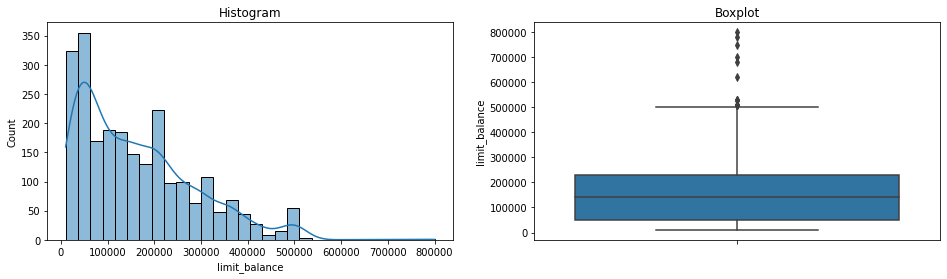

1.0161099404252507


In [ ]:
# memeriksa kolom limit_balance

diagnostic_plots(X_train, 'limit_balance')

Kolom limit_balance memiliki persebaran rightskewed. Terdapat beberapa outlier di sisi kanan histogram. Nilai outlier masih masuk di akal sehingga limit_balance tetap dibiarkan original.

#### 2. Memeriksa kolom age

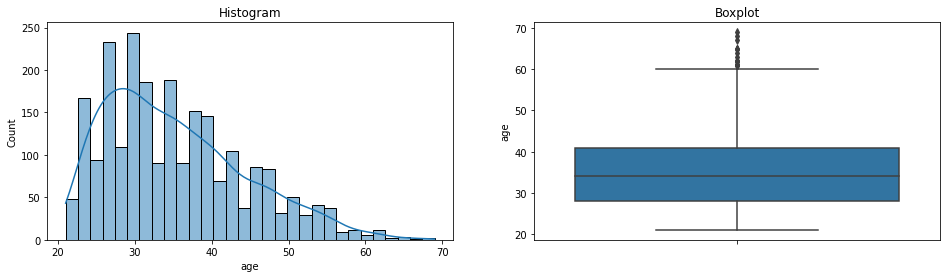

0.7479161592017429


In [ ]:
# memeriksa kolom age

diagnostic_plots(X_train, 'age')

Kolom age memiliki persebaran rightskewed. Terdapat beberapa outlier di sisi kanan histogram. Batas usia kredit di Negara Taiwan adalah 20-70 tahun. Nilai outlier masih masuk di akal sehingga age dibiarkan original.

#### 3. Memeriksa kolom bill_amt

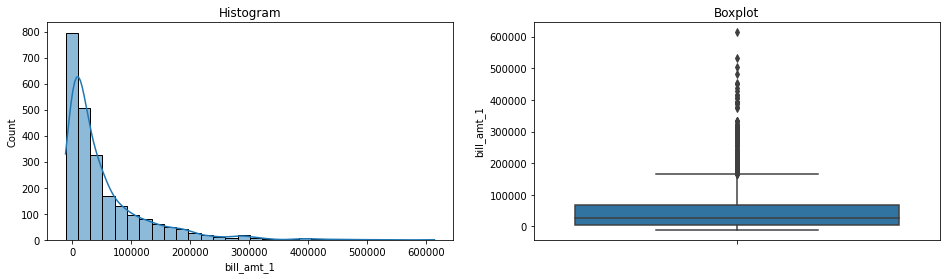

2.511343149804088


In [ ]:
# memeriksa kolom bill_amt_1 sebagai representasi dari kolom bill_amt_1 s/d 6

diagnostic_plots(X_train, 'bill_amt_1')

In [ ]:
# memeriksa nilai negatif pada kolom bill_amt_1

X_train[X_train.bill_amt_1 < 0]

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
2101,300000.0,1,3,1,53.0,-2.0,-2.0,-2.0,-2.0,-2,-2,-3.0,-3.0,-3.0,580.0,992.0,1205.0,0.0,0.0,583.0,992.0,1205.0,96.0
2919,230000.0,1,1,1,39.0,1.0,-1.0,-1.0,-2.0,-2,-2,-17.0,1786.0,0.0,0.0,0.0,0.0,1803.0,0.0,0.0,0.0,0.0,0.0
2022,360000.0,1,1,2,29.0,1.0,-2.0,-1.0,-1.0,-1,-1,-1808.0,-1808.0,6458.0,825.0,825.0,825.0,0.0,9091.0,825.0,825.0,825.0,825.0
2059,280000.0,1,1,2,31.0,-2.0,-2.0,-2.0,-2.0,-2,-2,-1.0,-1.0,-1.0,-1.0,-1.0,219.0,0.0,0.0,82150.0,0.0,220.0,1124.0
2098,290000.0,1,1,1,37.0,-2.0,-2.0,-2.0,-2.0,-2,-2,-17.0,3465.0,10069.0,4225.0,-4.0,871.0,3482.0,10194.0,4276.0,0.0,875.0,3852.0
2278,290000.0,2,2,1,39.0,1.0,-2.0,-2.0,-2.0,-2,-2,-70.0,9540.0,390.0,3184.0,390.0,390.0,10000.0,800.0,3184.0,390.0,390.0,6617.0
2387,110000.0,2,1,2,28.0,1.0,-1.0,-1.0,-1.0,0,0,-100.0,200.0,400.0,46952.0,48455.0,47324.0,500.0,400.0,46952.0,3000.0,3000.0,2000.0
2824,270000.0,1,2,2,36.0,1.0,-1.0,-1.0,-2.0,-1,0,-16.0,3326.0,-54.0,-54.0,19315.0,8388.0,3342.0,0.0,0.0,19369.0,996.0,3.0
2032,50000.0,1,2,1,32.0,1.0,-2.0,-1.0,-1.0,-1,0,-11545.0,-1935.0,7321.0,2850.0,6340.0,3110.0,10000.0,10000.0,7867.0,6340.0,3000.0,2218.0
2723,260000.0,1,1,1,43.0,1.0,-1.0,2.0,0.0,-1,-1,-10.0,5172.0,2800.0,3804.0,5009.0,3035.0,5182.0,9.0,2998.0,5034.0,3050.0,2965.0


Bill_amt_1 menjadi representasi Bill_amt_1 s/d 6.

Bill_amt_1 memiliki persebaran right skewed. Terdapat bbrp nilai yang negatif. 

Nilai negatif sangat memungkinkan karena pay_amt bulan-bulan sebelumnya sangat bagus bahkan bbrp melebihi nilai bill_amt. Sehingga kita membiarkan Bill_amt_1 s/d 6 tetap original.

### b. Memeriksa Persebaran dan Outliers dari X_train Kategorikal serta melakukan Handling: Trim/Replace/Capped.

#### 1. Berdasarkan deskripsi Big Query, educational level terdiri dari angka 1 s/d 6, angka 4, 5, 6 melambangkan others/unknown. Kita akan mengganti angka 0, 5, 6 menjadi angka 0 (others).

In [ ]:
# replace element educational_level
X_train.education_level = X_train.education_level.replace([0,4,5,6], [0,0,0,0])

# check educational_level value_count
X_train.education_level.value_counts()

2    1145
1     816
3     371
0      32
Name: education_level, dtype: int64

In [ ]:
X_test.education_level = X_test.education_level.replace([0,4,5,6], [0,0,0,0])

#### 2. Berdasarkan Big Query, marital status terdiri dari angka 1, 2, dan 3 (others). Kita akan mengganti angka 0 dengan angka 3.

In [ ]:
# replace element marital_status pada train set
X_train.marital_status = X_train.marital_status.replace([0],[3])

# replace element marital_status pada test set
X_test.marital_status = X_test.marital_status.replace([0],[3])

# check marital_status value_counts
X_train.marital_status.value_counts()

2    1284
1    1051
3      29
Name: marital_status, dtype: int64

#### 2. Berdasarkan Big Query, pay 1, pay 2, pay 3, pay 4, pay 5, pay 6 dimulai dari angka -1. Kita menemukan angka -2. Kita akan menentukan apakah dibutuhkan handling angka -2

In [ ]:
# melihat value_counts dari pay_1

X_train.pay_1.value_counts()

 0.0    1211
-1.0     429
 1.0     286
 2.0     202
-2.0     199
 3.0      24
 4.0       7
 8.0       3
 5.0       1
 7.0       1
 6.0       1
Name: pay_1, dtype: int64

In [ ]:
# melihat value_counts dari pay_2

X_train.pay_2.value_counts()

 0.0    1283
-1.0     466
 2.0     294
-2.0     278
 3.0      28
 4.0       6
 1.0       3
 7.0       3
 5.0       2
 6.0       1
Name: pay_2, dtype: int64

Berdasarkan pengecekan pay_1 dan pay_2, angka -2 cukup banyak sehingga angka tersebut akan dibiarkan dan dianggap sebagai others/unknown. Berdasarkan value_counts kita menemukan ada beberapa kategori yang hanya sedikit nilainya yaitu angka 4,5,6,7,8. Kita akan melakukan handling di bagian berikutnya.

#### 3. memeriksa value_counts dari pay 1, pay 2, pay 3, pay 4, pay 5, pay 6 dan mengubah element

In [ ]:
# melihat value_counts dari pay_1 train

X_train.pay_1.value_counts()

 0.0    1211
-1.0     429
 1.0     286
 2.0     202
-2.0     199
 3.0      24
 4.0       7
 8.0       3
 5.0       1
 7.0       1
 6.0       1
Name: pay_1, dtype: int64

In [ ]:
# melihat value_counts dari pay_1 test

X_test.pay_1.value_counts()

 0.0    300
-1.0    109
 1.0     70
 2.0     58
-2.0     47
 3.0      5
 5.0      1
 7.0      1
Name: pay_1, dtype: int64

In [ ]:
# melihat value_counts dari pay_2 train

X_train.pay_2.value_counts()

 0.0    1283
-1.0     466
 2.0     294
-2.0     278
 3.0      28
 4.0       6
 1.0       3
 7.0       3
 5.0       2
 6.0       1
Name: pay_2, dtype: int64

In [ ]:
# melihat value_counts dari pay_3 train

X_train.pay_3.value_counts()

 0.0    1291
-1.0     457
 2.0     296
-2.0     288
 3.0      20
 4.0       6
 6.0       3
 5.0       2
 7.0       1
Name: pay_3, dtype: int64

In [ ]:
# melihat value_counts dari pay_4 train

X_train.pay_4.value_counts()

 0.0    1338
-1.0     420
-2.0     324
 2.0     255
 3.0      12
 4.0       5
 5.0       5
 7.0       4
 8.0       1
Name: pay_4, dtype: int64

In [ ]:
# melihat value_counts dari pay_5 train

X_train.pay_5.value_counts()

 0    1371
-1     402
-2     343
 2     222
 3      13
 4       7
 7       5
 5       1
Name: pay_5, dtype: int64

In [ ]:
# melihat value_counts dari pay_6 train

X_train.pay_6.value_counts()

 0    1309
-1     432
-2     366
 2     235
 3      15
 7       4
 4       2
 6       1
Name: pay_6, dtype: int64

Kategori keterlambatan 4,5,6,7 bulan terlalu sedikit oleh karena itu akan kita replace dengan angka 4 yang melambangkan keterlambatan bayar 4 bulan atau lebih.

In [ ]:
# replace angka 4, 5, 6, 7 feature pay_1 s/d pay_6 train dengan angka 4

X_train.pay_1 = X_train.pay_1.replace([4,5,6,7,8], [4,4,4,4,4])
X_train.pay_2 = X_train.pay_1.replace([4,5,6,7,8], [4,4,4,4,4])
X_train.pay_3 = X_train.pay_1.replace([4,5,6,7,8], [4,4,4,4,4])
X_train.pay_4 = X_train.pay_1.replace([4,5,6,7,8], [4,4,4,4,4])
X_train.pay_5 = X_train.pay_1.replace([4,5,6,7,8], [4,4,4,4,4])
X_train.pay_6 = X_train.pay_1.replace([4,5,6,7,8], [4,4,4,4,4])

X_train.pay_1

747     0.0
479     0.0
1742    1.0
1832    2.0
2829   -1.0
       ... 
1987    1.0
1283    0.0
1414    0.0
1691    1.0
1867    2.0
Name: pay_1, Length: 2364, dtype: float64

In [ ]:
# replace angka 4, 5, 6, 7 feature pay_1 s/d pay_6 test dengan angka 4

X_test.pay_1 = X_test.pay_1.replace([4,5,6,7,8], [4,4,4,4,4])
X_test.pay_2 = X_test.pay_1.replace([4,5,6,7,8], [4,4,4,4,4])
X_test.pay_3 = X_test.pay_1.replace([4,5,6,7,8], [4,4,4,4,4])
X_test.pay_4 = X_test.pay_1.replace([4,5,6,7,8], [4,4,4,4,4])
X_test.pay_5 = X_test.pay_1.replace([4,5,6,7,8], [4,4,4,4,4])
X_test.pay_6 = X_test.pay_1.replace([4,5,6,7,8], [4,4,4,4,4])

X_test.pay_6.value_counts()

 0.0    300
-1.0    109
 1.0     70
 2.0     58
-2.0     47
 3.0      5
 4.0      2
Name: pay_6, dtype: int64

## 4. Handling Missing Value

Berdasarkan EDA, tidak adak missing value pada data sehingga kita melongkap bagian ini.

## 5. Feature Selection

Berdasarkan EDA, kita memakai semua fitur dari data atau X_train dan X_test beranggotakan semua fitur.

## 6. Split Between Numerical Columns and Categorical Columns

In [ ]:
# display columns name

X_train.columns

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6'],
      dtype='object')

In [ ]:
# memilih num_columns dan cat_columns

num_columns = ['limit_balance', 'age', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6']

cat_columns_1 = ['sex', 'marital_status', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

cat_columns_2 = ['education_level']

In [ ]:
# membagi Train-Set dan Test-Set berdasarkan Tipe Kolom

X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

X_train_cat_1= X_train[cat_columns_1]
X_test_cat_1 = X_test[cat_columns_1]

X_train_cat_2= X_train[cat_columns_2]
X_test_cat_2 = X_test[cat_columns_2]

## 7. Feature Scaling

Kita menggunakan MinMaxScaler karena semua kolom numerik memiliki distribusi skewed.

In [ ]:
# Feature Scaling using MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [ ]:
# melihat hasil scaling

X_train_num_scaled

array([[2.78481013e-01, 7.08333333e-01, 3.51481040e-01, ...,
        4.94863319e-02, 2.57684805e-02, 2.47831475e-02],
       [1.39240506e-01, 4.16666667e-01, 2.03087599e-01, ...,
        4.94863319e-03, 2.80876438e-01, 1.04089219e-02],
       [1.26582278e-02, 6.25000000e-02, 2.95920244e-02, ...,
        4.94863319e-03, 1.28842403e-03, 1.23915737e-03],
       ...,
       [5.06329114e-02, 2.70833333e-01, 7.86498349e-02, ...,
        2.93453948e-03, 6.23597228e-04, 4.21610905e-02],
       [1.13924051e-01, 2.08333333e-01, 1.74629240e-01, ...,
        1.48458996e-02, 7.21517454e-03, 6.68401487e-03],
       [2.53164557e-02, 1.04166667e-01, 5.94174975e-02, ...,
        1.23715830e-02, 0.00000000e+00, 1.48698885e-03]])

## 8. Feature Encoding

Kita melakukan encoding terhadap kolom education_level dengan OrdinalScaler karena merupakan tipe ordinal.

In [ ]:
# encode X_train_cat_2

encoder_2 = OrdinalEncoder()
encoder_2.fit(X_train_cat_2)

X_train_cat_2_encoded = encoder_2.transform(X_train_cat_2)
X_test_cat_2_encoded = encoder_2.transform(X_test_cat_2)

## 9. Concate Between Numerical Columns and Categorical Columns

In [ ]:
# menggabungkan feature numerikal dengan feature kategorikal train set

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_1, X_train_cat_2_encoded], axis=1)
X_train_final

array([[0.27848101, 0.70833333, 0.35148104, ..., 0.        , 0.        ,
        3.        ],
       [0.13924051, 0.41666667, 0.2030876 , ..., 0.        , 0.        ,
        1.        ],
       [0.01265823, 0.0625    , 0.02959202, ..., 1.        , 1.        ,
        2.        ],
       ...,
       [0.05063291, 0.27083333, 0.07864983, ..., 0.        , 0.        ,
        2.        ],
       [0.11392405, 0.20833333, 0.17462924, ..., 1.        , 1.        ,
        2.        ],
       [0.02531646, 0.10416667, 0.0594175 , ..., 2.        , 2.        ,
        2.        ]])

In [ ]:
# menggabungkan feature numerikal dengan feature kategorikal test set

X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_1, X_test_cat_2], axis=1)

# VI. Model Definition

In [ ]:
# membuat mod_SVM

mod_SVM = SVC(kernel='rbf', C = 1, random_state = 12)

In [ ]:
# membuat mod_LR

mod_LR = LogisticRegression(C =1, dual=False, random_state = 12)

In [ ]:
# membuat mod_DT

mod_DT = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = 100, random_state = 12)

In [ ]:
# membuat mod_RF

mod_RF = RandomForestClassifier(n_estimators=20, oob_score=True, random_state = 12)

In [ ]:
# membuat mod_KNN

mod_KNN = KNeighborsClassifier(n_neighbors = 4, weights = 'distance')

In [ ]:
# membuat mod_NB1

mod_NB1 = GaussianNB()

In [ ]:
# membuat mod_NB2

mod_NB2 = GaussianNB(var_smoothing = [1e5])

In [ ]:
# membuat mod_GBC

mod_GBC = GradientBoostingClassifier(n_estimators=20, random_state = 12)

# VII. Model Training

In [ ]:
# menghitung score mod_SVM

scores = cross_val_score(mod_SVM, X_train_final, y_train, cv=5, scoring='f1')

print(round(scores.mean(),3), '+/-', round(scores.std(),3))

0.47 +/- 0.064


In [ ]:
# menghitung score mod_LR

scores = cross_val_score(mod_LR, X_train_final, y_train, cv=5, scoring='f1')

print(round(scores.mean(),3), '+/-', round(scores.std(),3))

0.442 +/- 0.051


In [ ]:
# menghitung score mod_DT

scores = cross_val_score(mod_DT, X_train_final, y_train, cv=5, scoring='f1')

print(round(scores.mean(),3), '+/-', round(scores.std(),3))

0.0 +/- 0.0


In [ ]:
# menghitung score mod_RF

scores = cross_val_score(mod_RF, X_train_final, y_train, cv=5, scoring='f1')

print(round(scores.mean(),3), '+/-', round(scores.std(),3))

0.465 +/- 0.042


In [ ]:
# menghitung score mod_KNN

scores = cross_val_score(mod_KNN, X_train_final, y_train, cv=5, scoring='f1')

print(round(scores.mean(),3), '+/-', round(scores.std(),3))

0.413 +/- 0.014


In [ ]:
# menghitung score mod_NB

scores = cross_val_score(mod_NB1, X_train_final, y_train, cv=5, scoring='f1')

print(round(scores.mean(),3), '+/-', round(scores.std(),3))

0.427 +/- 0.035


In [ ]:
# menghitung score mod_GBC

scores = cross_val_score(mod_GBC, X_train_final, y_train, cv=5, scoring='f1')

print(round(scores.mean(),3), '+/-', round(scores.std(),3))

0.459 +/- 0.062


Kita memilih model mod_GBC untuk di tuning dengan hyperparameter karena mod_GBC memiliki ketepatan yang cukup bagus yaitu 0.459 dan merupakan model yang tergolong cepat. Model dengan f1 scoring terburuk adalah DecisionTreeClassifier dengan ketepatan 0.0.

In [ ]:
# melakukan fit dan predict dengan mod_GBC

mod_GBC.fit(X_train_final,y_train)
y_pred_GBC1_test = mod_GBC.predict(X_test)
y_pred_GBC1_train = mod_GBC.predict(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
# randomsearch untuk mod_GBC

# %%time

# random_grid = {'n_estimators': [10, 50, 150],
#             'loss': ['log_loss', 'deviance', 'exponential'],
#             'max_features': ['auto', 'sqrt', 'log2'],
#             'max_depth': [50, 100, 150],
#             'min_samples_split': [50, 100, 150],
#             'min_samples_leaf': [50, 100, 150],
#             'criterion': ['friedman_mse', 'squared_error', 'mse']
#             }

# GBC_randomcv= RandomizedSearchCV(estimator=mod_GBC, param_distributions=random_grid, n_iter=40, cv=5, random_state=46)

# GBC_randomcv.fit(X_train_final, y_train)

# melihat best_param

# GBC_randomcv.best_params_

In [ ]:
# gridsearch untuk mod_ menentukan param_grid

param_grid = [{'n_estimators':[38, 40, 42],
               'max_features': ['sqrt'],
               'loss': ['deviance']}]

In [ ]:
# gridsearch untuk mod_GBC

%%time
grid_search = GridSearchCV(estimator = mod_GBC, param_grid = param_grid, cv=5, verbose=2)

grid_search.fit(X_train_final,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ..loss=deviance, max_features=sqrt, n_estimators=38; total time=   0.1s
[CV] END ..loss=deviance, max_features=sqrt, n_estimators=38; total time=   0.1s
[CV] END ..loss=deviance, max_features=sqrt, n_estimators=38; total time=   0.1s
[CV] END ..loss=deviance, max_features=sqrt, n_estimators=38; total time=   0.1s
[CV] END ..loss=deviance, max_features=sqrt, n_estimators=38; total time=   0.1s
[CV] END ..loss=deviance, max_features=sqrt, n_estimators=40; total time=   0.1s
[CV] END ..loss=deviance, max_features=sqrt, n_estimators=40; total time=   0.1s
[CV] END ..loss=deviance, max_features=sqrt, n_estimators=40; total time=   0.1s
[CV] END ..loss=deviance, max_features=sqrt, n_estimators=40; total time=   0.1s
[CV] END ..loss=deviance, max_features=sqrt, n_estimators=40; total time=   0.1s
[CV] END ..loss=deviance, max_features=sqrt, n_estimators=42; total time=   0.1s
[CV] END ..loss=deviance, max_features=sqrt, n_es

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(n_estimators=20,
                                                  random_state=12),
             param_grid=[{'loss': ['deviance'], 'max_features': ['sqrt'],
                          'n_estimators': [38, 40, 42]}],
             verbose=2)

In [ ]:
# melihat best parameter

grid_search.best_params_

{'loss': 'deviance', 'max_features': 'sqrt', 'n_estimators': 42}

In [ ]:
# fit model dan melihat best_params

%%time
grid_search.fit(X_train_final, y_train)

print('Best parameters: {}'.format(grid_search.best_params_))
print('Best cross-validation score: {:.2f}'.format(grid_search.best_score_))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ..loss=deviance, max_features=sqrt, n_estimators=38; total time=   0.1s
[CV] END ..loss=deviance, max_features=sqrt, n_estimators=38; total time=   0.1s
[CV] END ..loss=deviance, max_features=sqrt, n_estimators=38; total time=   0.1s
[CV] END ..loss=deviance, max_features=sqrt, n_estimators=38; total time=   0.1s
[CV] END ..loss=deviance, max_features=sqrt, n_estimators=38; total time=   0.1s
[CV] END ..loss=deviance, max_features=sqrt, n_estimators=40; total time=   0.1s
[CV] END ..loss=deviance, max_features=sqrt, n_estimators=40; total time=   0.1s
[CV] END ..loss=deviance, max_features=sqrt, n_estimators=40; total time=   0.1s
[CV] END ..loss=deviance, max_features=sqrt, n_estimators=40; total time=   0.1s
[CV] END ..loss=deviance, max_features=sqrt, n_estimators=40; total time=   0.1s
[CV] END ..loss=deviance, max_features=sqrt, n_estimators=42; total time=   0.1s
[CV] END ..loss=deviance, max_features=sqrt, n_es

In [ ]:
# membuat model baru mod_GBC_grid

mod_GBC_grid = grid_search.best_estimator_

In [ ]:
# melakukan predict dengan mod_GBC_grid

y_pred_GBC_grid_test = mod_GBC_grid.predict(X_test)
y_pred_GBC_grid_train = mod_GBC_grid.predict(X_train_final)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


---
Statement:

Model yang kita gunakan adalah Model SVM dengan tuning parameter n_estimator, loss, dan max_features. 

# VIII. Model Evaluation

Kita menggunakan evaluation metrik accuracy, confusion matrix, dan clasification report untuk target kategori.

In [ ]:
# evaluasi train mod_GBC

# print('accuracy score train : ',accuracy_score(y_pred_GBC1_train, y_train))
# print('accuracy score test : ',accuracy_score(y_pred_GBC1_test, y_test), '\n')

print('---- confusion matrix train dan test mod_GBC ----')
print(confusion_matrix(y_pred_GBC1_train, y_train))
print(confusion_matrix(y_pred_GBC1_test, y_test), '\n')

print('---- classification report train mod_GBC ----')
print(classification_report(y_pred_GBC1_train,y_train), '\n')

print('---- classification report test mod_GBC ----')
print(classification_report(y_pred_GBC1_test,y_test))


---- confusion matrix train dan test mod_GBC ----
[[1799  488]
 [  54   23]]
[[450 113]
 [ 21   7]] 

---- classification report train mod_GBC ----
              precision    recall  f1-score   support

           0       0.97      0.79      0.87      2287
           1       0.05      0.30      0.08        77

    accuracy                           0.77      2364
   macro avg       0.51      0.54      0.47      2364
weighted avg       0.94      0.77      0.84      2364
 

---- classification report test mod_GBC ----
              precision    recall  f1-score   support

           0       0.96      0.80      0.87       563
           1       0.06      0.25      0.09        28

    accuracy                           0.77       591
   macro avg       0.51      0.52      0.48       591
weighted avg       0.91      0.77      0.83       591



Evaluasi train & test mod_GBC:

- Confusion matrix train menunjukkan default_payment 0 benar diprediksi 1799 (TP) dan salah prediksi 488 (FN), default_payment 1 benar diprediksi 54 (TN) dan salah diprediksi 23 (FP). Kesalahan prediksi pada kolom 1 dan kolom 2 cukup besar.

- Precision train untuk 0 yaitu 0.97(97%) yg artinya berhasil meprediksi 97% orang mampu membayar kredit di bulan depan dan 3% gagal memprediksi. Precision test untuk 1 yaitu 0.05 yg artinya berhasil meprediksi 5% orang gagal membayar kredit di bulan depan dan 95% gagal memprediksi.

- Recall train untuk 0 yaitu 0.79(79%) yg artinya berhasil meprediksi 79% orang mampu membayar kredit di bulan depan dan 21% gagal memprediksi Recall test untuk 1 yaitu 0.30 yg artinya berhasil meprediksi 30% orang gagal membayar kredit di bulan depan dan 70% gagal memprediksi.

- __Confusion matrix test__ menunjukkan default_payment 0 benar diprediksi 450 (TP) dan salah prediksi 113 (FN), default_payment 1 benar diprediksi 7 (TN) dan salah diprediksi 21 (FP). Kesalahan prediksi pada kolom 1 dan kolom 2 cukup besar.

- __Precision test untuk 0__ yaitu 0.96(96%) yg artinya berhasil meprediksi 96% orang mampu membayar kredit di bulan depan dan 4% gagal memprediksi. __Precision test untuk 1__ yaitu 0.06 yg artinya berhasil meprediksi 6% orang gagal membayar kredit di bulan depan dan 94% gagal memprediksi.

- __Recall test untuk 0__ yaitu 0.80(80%) yg artinya berhasil meprediksi 80% orang mampu membayar kredit di bulan depan dan 20% gagal memprediksi. __Recall test untuk 1__ yaitu 0.25 yg artinya berhasil meprediksi 35% orang gagal membayar kredit di bulan depan dan 75% gagal memprediksi.

- Kesalahan prediksi tersebut dapat mengakibat seseorang yang tidak mampu membayar kredit mendapatkan persetujuan permintaan kredit dari Bank.

- Kurang nya prediksi pada angka 1 itu disebabkan karena data yang imbalance oleh karena itu perlu dilakukan untuk improvement. Seperti pengurangan atau penambahan feature, mengganti model atau melakukan parameter tuning dari model.

In [ ]:
# evaluasi train mod_GBC_grid

# print('accuracy score train : ',accuracy_score(y_pred_GBC_grid_train, y_train))
# print('accuracy score test : ',accuracy_score(y_pred_GBC_grid_test, y_test), '\n')

print('---- confusion matrix train dan test mod_GBC_grid ----')
print(confusion_matrix(y_pred_GBC_grid_train, y_train))
print(confusion_matrix(y_pred_GBC_grid_test, y_test), '\n')

print('---- classification report train mod_GBC_grid ----')
print(classification_report(y_pred_GBC_grid_train,y_train), '\n')

print('---- classification report test mod_GBC_grid ----')
print(classification_report(y_pred_GBC_grid_test,y_test))


---- confusion matrix train dan test mod_GBC_grid ----
[[1805  326]
 [  48  185]]
[[337  92]
 [134  28]] 

---- classification report train mod_GBC_grid ----
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      2131
           1       0.36      0.79      0.50       233

    accuracy                           0.84      2364
   macro avg       0.67      0.82      0.70      2364
weighted avg       0.91      0.84      0.87      2364
 

---- classification report test mod_GBC_grid ----
              precision    recall  f1-score   support

           0       0.72      0.79      0.75       429
           1       0.23      0.17      0.20       162

    accuracy                           0.62       591
   macro avg       0.47      0.48      0.47       591
weighted avg       0.58      0.62      0.60       591



Evaluasi train & test mod_GBC_grid:

- Confusion matrix train menunjukkan default_payment 0 benar diprediksi 1805 (TP) dan salah prediksi 326 (FN), default_payment 1 benar diprediksi 185 (TN) dan salah diprediksi 48 (FP). Kesalahan prediksi pada kolom 1 dan kolom 2 cukup besar.

- Precision train untuk 0 yaitu 0.97(97%) yg artinya berhasil meprediksi 97% orang mampu membayar kredit di bulan depan dan 3% gagal memprediksi. Precision test untuk 1 yaitu 0.36 yg artinya berhasil meprediksi 36% orang gagal membayar kredit di bulan depan dan 64% gagal memprediksi.

- Recall train untuk 0 yaitu 0.85(85%) yg artinya berhasil meprediksi 85% orang mampu membayar kredit di bulan depan dan 15% gagal memprediksi. Recall test untuk 1 yaitu 0.79 yg artinya berhasil meprediksi 79% orang gagal membayar kredit di bulan depan dan 21% gagal memprediksi.

- __Confusion matrix test__ menunjukkan default_payment 0 benar diprediksi 337 (TP) dan salah prediksi 92 (FN), default_payment 1 benar diprediksi 134 (TN) dan salah diprediksi 28 (FP). Kesalahan prediksi pada kolom 1 dan kolom 2 cukup besar.

- __Precision test untuk 0__ yaitu 0.72(72%) yg artinya berhasil meprediksi 72% orang mampu membayar kredit di bulan depan dan 28% gagal memprediksi. __Precision test untuk 1__ yaitu 0.23 yg artinya berhasil meprediksi 23% orang gagal membayar kredit di bulan depan dan 77% gagal memprediksi.

- __Recall test untuk 0__ yaitu 0.79(79%) yg artinya berhasil meprediksi 79% orang mampu membayar kredit di bulan depan dan 21% gagal memprediksi. __Recall test untuk 1__ yaitu 0.17 yg artinya berhasil meprediksi 17% orang gagal membayar kredit di bulan depan dan 83% gagal memprediksi.

- Kesalahan prediksi tersebut dapat mengakibat seseorang yang tidak mampu membayar kredit mendapatkan persetujuan permintaan kredit dari Bank.

- Kurang nya prediksi pada angka 1 itu disebabkan karena data yang imbalance oleh karena itu perlu dilakukan untuk improvement. Seperti pengurangan atau penambahan feature, mengganti model atau melakukan parameter tuning dari model.

---
Statement:

- __model mod_GBC good fit,__ mampu memprediksi kategori 0 dengan precision sebesar 96% dan recall 80%. Namun lemah terhadap kategori 1 dengan precision 6 % dan recall 25 %. __Model ini baik untuk memprediksi orang yang mampu membayar kredit dan lemah memprediksi orang yang tidak mampu membayar kredit.__ Kelemahan prediksi pada kategori 1 disebabkan data yang imbalance antara kategori 0 dan 1.

- __model mod_GBC_grid,__ mampu memprediksi kategori 0 dengan precision sebesar 72% dan recall 79%. Model ini memprediksi kategori 1 dengan precision 23 % dan recall 17 %. __Model ini baik untuk memprediksi orang yang mampu membayar kredit dan lemah memprediksi orang yang tidak mampu membayar kredit.__ Kelemahan prediksi pada kategori 1 disebabkan data yang imbalance antara kategori 0 dan 1 dan kesalahan tuning parameter. Data scientist harus meneliti model dan parameter lebih lagi.

- metric evaluasi yang digunakan adalah __confusion matrix, precision, recall.__

- __model yang dibutuhkan oleh Bank yang akan memberikan pinjaman kredit adalah model dengan presicion 1 mendekati 1 karena lebih sedikit gagal memprediksi orang yang tidak mampu membayar kredit atau boleh menerima kredit.__  

- __model yang akan kita gunakan untuk memprediksi data inference adalah model mod_GBC_grid.__

# X. Model Inference

In [ ]:
# show model inf
data_i

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,200000.0,1,1,2,30.0,-1.0,-1.0,-1.0,-1.0,0,0,6589.0,3423.0,2785.0,54271.0,60326.0,63339.0,3449.0,2798.0,54271.0,7000.0,4000.0,6000.0,0
1,50000.0,1,2,2,27.0,2.0,2.0,2.0,2.0,2,2,48655.0,45570.0,44015.0,36724.0,45751.0,46497.0,460.0,5021.0,0.0,10000.0,2005.0,37.0,1
2,410000.0,2,1,2,31.0,0.0,0.0,0.0,0.0,0,0,134072.0,133604.0,133882.0,135954.0,134250.0,129971.0,15003.0,15877.0,30000.0,14250.0,9971.0,27380.0,0
3,100000.0,1,1,2,30.0,0.0,0.0,0.0,0.0,0,0,100544.0,101167.0,101007.0,97862.0,79099.0,79812.0,4511.0,3711.0,3685.0,2797.0,2897.0,3046.0,1
4,310000.0,1,1,1,45.0,-2.0,-2.0,-2.0,-2.0,-2,-2,8964.0,1168.0,6495.0,-16.0,-16.0,-16.0,1174.0,6527.0,0.0,0.0,0.0,0.0,0
5,20000.0,1,1,2,24.0,-1.0,-1.0,-1.0,-1.0,-1,-2,390.0,390.0,390.0,780.0,0.0,0.0,390.0,390.0,780.0,0.0,0.0,0.0,0
6,230000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0,0,301038.0,305327.0,213058.0,216260.0,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1
7,100000.0,1,5,1,38.0,0.0,0.0,0.0,0.0,0,0,101330.0,100278.0,100733.0,96038.0,94646.0,96631.0,3824.0,4311.0,3648.0,3370.0,3492.0,3614.0,0
8,50000.0,2,2,1,32.0,0.0,0.0,0.0,0.0,0,0,36062.0,36345.0,10529.0,8337.0,2475.0,0.0,1500.0,1847.0,1000.0,0.0,0.0,0.0,0
9,20000.0,1,1,2,24.0,2.0,2.0,2.0,2.0,2,2,1891.0,5680.0,5441.0,6346.0,6099.0,7235.0,4000.0,0.0,1000.0,0.0,1237.0,1000.0,1


In [ ]:
# handling outlier

## replace kategori pada kolom education_level dari 0,4,5,6 jadi 0
data_i.education_level = data_i.education_level.replace([0,4,5,6], [0,0,0,0])

# replace kategori pada kolom marital
data_i.marital_status = data_i.marital_status.replace([0],[3])

# replace kategori pada kolom pay_1 s/d pay_6
data_i.pay_1 = data_i.pay_1.replace([4,5,6,7,8], [4,4,4,4,4])
data_i.pay_2 = data_i.pay_1.replace([4,5,6,7,8], [4,4,4,4,4])
data_i.pay_3 = data_i.pay_1.replace([4,5,6,7,8], [4,4,4,4,4])
data_i.pay_4 = data_i.pay_1.replace([4,5,6,7,8], [4,4,4,4,4])
data_i.pay_5 = data_i.pay_1.replace([4,5,6,7,8], [4,4,4,4,4])
data_i.pay_6 = data_i.pay_1.replace([4,5,6,7,8], [4,4,4,4,4])

In [ ]:
# membagi Train-Set dan Test-Set berdasarkan Tipe Kolom

X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

X_train_cat_1= X_train[cat_columns_1]
X_test_cat_1 = X_test[cat_columns_1]

X_train_cat_2= X_train[cat_columns_2]
X_test_cat_2 = X_test[cat_columns_2]

In [ ]:
# convert data using scaler and encoder

data_i_num = data_i[num_columns]
data_i_cat_1 = data_i[cat_columns_1]
data_i_cat_2 = data_i[cat_columns_2]

data_i_scaled = scaler.transform(data_i_num)
data_i_cat_2_encoded = encoder_2.transform(data_i_cat_2)

data_i_final = np.concatenate([data_i_scaled, data_i_cat_1, data_i_cat_2_encoded], axis=1)

data_i_final.shape

(10, 23)

In [ ]:
# memprediksi target dengan mod_GBC_grid

y_pred_i_GBC_grid = mod_GBC_grid.predict(data_i_final)

y_pred_i_GBC_grid_df = pd.DataFrame(y_pred_i_GBC_grid, columns=['dp_prediction_GBC_grid'])

In [ ]:
# menggabungkan dalam tabel

data_i = pd.concat([data_i, y_pred_i_GBC_grid_df], axis=1)
data_i

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month,dp_prediction_GBC_grid
0,200000.0,1,1,2,30.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,6589.0,3423.0,2785.0,54271.0,60326.0,63339.0,3449.0,2798.0,54271.0,7000.0,4000.0,6000.0,0,0
1,50000.0,1,2,2,27.0,2.0,2.0,2.0,2.0,2.0,2.0,48655.0,45570.0,44015.0,36724.0,45751.0,46497.0,460.0,5021.0,0.0,10000.0,2005.0,37.0,1,1
2,410000.0,2,1,2,31.0,0.0,0.0,0.0,0.0,0.0,0.0,134072.0,133604.0,133882.0,135954.0,134250.0,129971.0,15003.0,15877.0,30000.0,14250.0,9971.0,27380.0,0,0
3,100000.0,1,1,2,30.0,0.0,0.0,0.0,0.0,0.0,0.0,100544.0,101167.0,101007.0,97862.0,79099.0,79812.0,4511.0,3711.0,3685.0,2797.0,2897.0,3046.0,1,0
4,310000.0,1,1,1,45.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,8964.0,1168.0,6495.0,-16.0,-16.0,-16.0,1174.0,6527.0,0.0,0.0,0.0,0.0,0,0
5,20000.0,1,1,2,24.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,390.0,390.0,390.0,780.0,0.0,0.0,390.0,390.0,780.0,0.0,0.0,0.0,0,0
6,230000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0.0,0.0,301038.0,305327.0,213058.0,216260.0,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1,0
7,100000.0,1,0,1,38.0,0.0,0.0,0.0,0.0,0.0,0.0,101330.0,100278.0,100733.0,96038.0,94646.0,96631.0,3824.0,4311.0,3648.0,3370.0,3492.0,3614.0,0,0
8,50000.0,2,2,1,32.0,0.0,0.0,0.0,0.0,0.0,0.0,36062.0,36345.0,10529.0,8337.0,2475.0,0.0,1500.0,1847.0,1000.0,0.0,0.0,0.0,0,0
9,20000.0,1,1,2,24.0,2.0,2.0,2.0,2.0,2.0,2.0,1891.0,5680.0,5441.0,6346.0,6099.0,7235.0,4000.0,0.0,1000.0,0.0,1237.0,1000.0,1,1


---
Statement:

Model yang digunakan untuk memprediksi adalah model mod_GBC_grid dengan hasil prediksi kolom dp_prediction_GBC_grid.

# XI. Pengambilan Kesimpulan

Kesimpulan:

Dari proses EDA ditemukan beberapa hal:
- Kita akan menggunakan semua kolom sebagai feature pada feature selection.

Dari proses preprocessing didapatkan:
1. terdapat kesalahan label pada kolom education_num dan marital_status sehingga perlu direplace.
2. dilakukan perubahan elemen pada kolom education_level, marital_level, pay_1 s/d pay_6 karena elemen melambangkan label dengan arti yang sama dan elemen melambangkan label yang terlalu sedikit isinya.
3. dilakukan MinMaxScaler terhadap feature 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6' karena feature memiliki distribusi skew.
4. dilakukan OrdinalEncoder terhadap feature 'education_level' karena feature merupakan data ordinal.

Dari proses model evaluation dan analysis didapatkan:
1. Dengan parameter default, model GBC menghasilkan akurasi terbaik dengan waktu tercepat. Oleh karena itu Data Scientist melakukan penelitian lebih dalam terhadap model ini
2. Data Scientist melakukan tuning parameter n_estimator, loss, max_features.
3. Model sebelum tunning yaitu mod_GBC menunjukan accuracy, precision, dan recall yang lebih baik pada label 0 dari pada label 1. Model setelah tunning yaitu mod_GBC_grid menunjukan accuracy, precision, dan recall yang lebih baik pada label 0 dari pada label 1. Hal ini dapat menyebabkan adanya seseorang yang tidak mampu membayar kredit mendapatkan persetujuan permintaan kredit dari Bank.
4. mod_GBC_grid memiliki precision yang lebih bagus daripada mod_GBC sehingga lebih bagus memprediksi gagal bayar/tidak layak mendapatkan kredit.

Insigth:
1. Dibutuhkan data yang lebih banyak atau lebih seimbang antara label 0 yang mampu membayar dan label 1 yang tidak mampu membayar.
2. Data Scientist perlu mencoba model lainnya.


# XII. Conceptual Problems

Pertanyaan:

1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!
2. Apakah fungsi dari pruning pada Tree model?
3. Bagaimana cara memilih K yang optimal pada KNN?
4. Jelaskan apa yang kalian ketahui tentang Cross Validation!
5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!

Jawab 1

Criterion adalah parameter untuk mengukur kualitas dan mengoptimalkan nilai split dari decision tree. Beberapa criteria yang dapat dipilih: “gini” untuk Gini impurity dan “log_loss” dan “entropy” untuk Shannon information.

Gini ditujukan untuk atribut kontinue dan cenderung menemukan kelas terbesar serta meminimalkan misclassification.

Jawab 2

Fungsi pruning atau pemangkasan pohon:

Mengidentifikasikan dan membuang cabang yang tidak diperlukan pada pohon berukuran besar berdasarkan nilai kepercayaan (confident level) sehingga kemampuan prediksi model meningkat.

Jawab 3

K dapat ditentukan secara random terlebih dahulu kemudian melakukan pemilihan nilai k terbaik melalui GridSearchCV.

Jawab 4

Cross validation adalah metode yang sering digunakan bersama k-fold untuk memecah-mecah data training dan melakukan pengujian model menggunakan data training sebelum menggunakan data tes.

Dengan cross valid kita dapat mengetahui kualitas model dan data training kita tanpa bias dari data test.

Jawab 5

- Accuracy: Metode evaluasi model yang menghitung jumlah True Positive dan True Negatif dibagi keseluruhan data (True Positive, False Negative, True Negative, dan False Positive).
- Precision: Metode evaluasi model yang menghitung True Positive  dibagi jumlah keseluruhan data yang Diprediksi Positif.
- Recall: Metode evaluasi model yang menghitung True Positive dibagi keseluruhan data yang benar
- F1 Score: Metode evaluasi model yang menghitung rata-rata Precision dan Recall dengan cara dua dikali (precision kali recall) dibagi (precision tambah recall).